# Importacion datos y librerias

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:


nombre_archivo = 'resultados_rutas.xlsx'
df_resultados = pd.read_excel(nombre_archivo)
print(df_resultados.head())

   Vehículo        Desde    Hasta Hora Salida Hora Llegada Demanda
0         1  Parqueadero  Pradera       05:00        05:20      36
1         1      Pradera  Panzenu       05:20        05:50      27
2         1      Panzenu  Pradera       05:50        06:20      39
3         1      Pradera  Panzenu       06:20        06:50      36
4         1      Panzenu  Pradera       06:50        07:20      41


# Grafico demanda satisfecha por hora en cabezeras

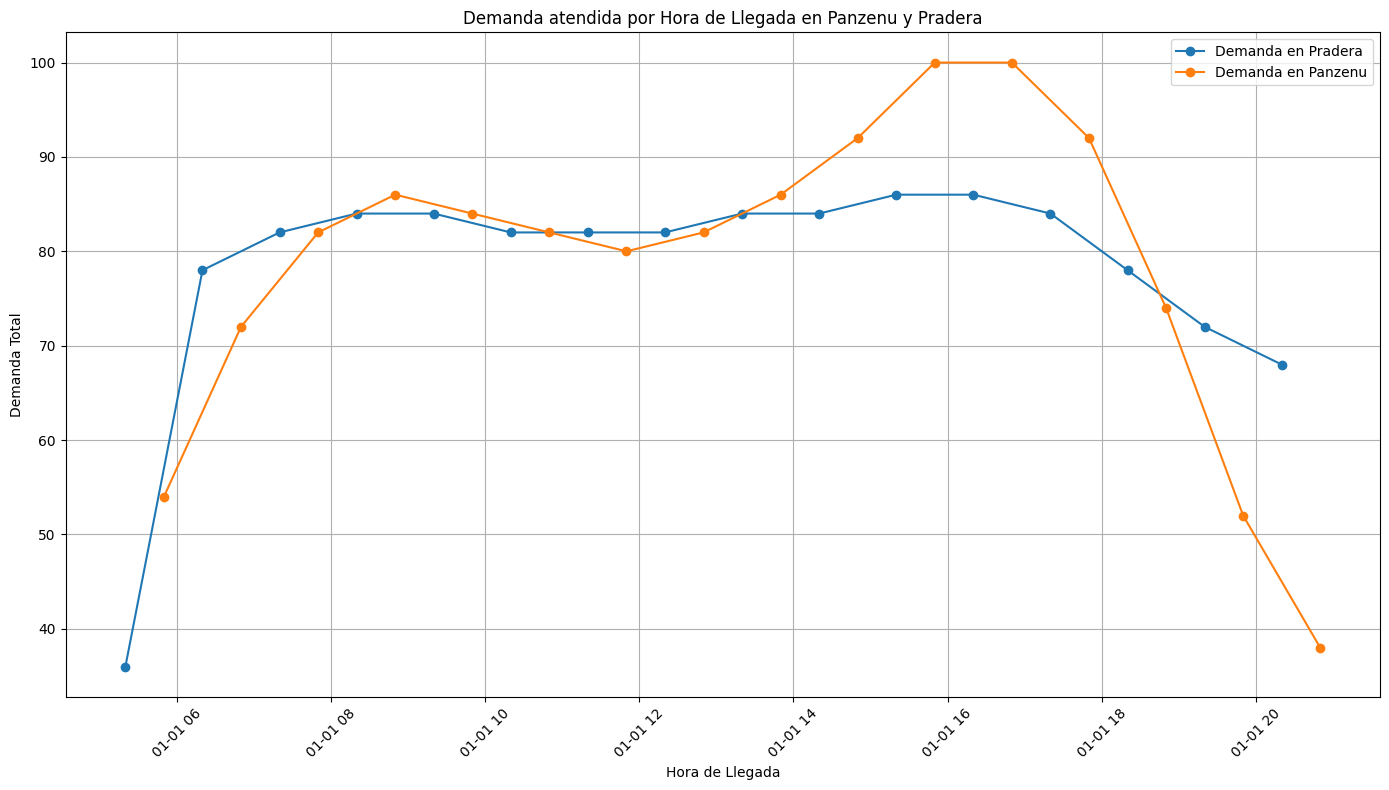

In [71]:

df_resultados['Hora Llegada'] = pd.to_datetime(df_resultados['Hora Llegada'], format='%H:%M').dt.time

df_resultados['Hora Llegada Datetime'] = pd.to_datetime(df_resultados['Hora Llegada'].astype(str), format='%H:%M:%S')

df_filtrado = df_resultados[df_resultados['Hasta'].isin(['Panzenu', 'Pradera'])]

df_demanda_agrupada = df_filtrado.groupby(['Hora Llegada Datetime', 'Hasta'])['Demanda'].sum().reset_index()

plt.figure(figsize=(14, 8))

for paradero in df_demanda_agrupada['Hasta'].unique():
    data_paradero = df_demanda_agrupada[df_demanda_agrupada['Hasta'] == paradero]
    plt.plot(data_paradero['Hora Llegada Datetime'], data_paradero['Demanda'], marker='o', label=f'Demanda en {paradero}')

plt.title('Demanda atendida por Hora de Llegada en Panzenu y Pradera')
plt.xlabel('Hora de Llegada')
plt.ylabel('Demanda Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# Grafico ingresos totales por bus

Ingresos Totales por Vehículo:
   Vehículo  Demanda  Ingresos Totales
0         1   1272.0         3561600.0
1         2   1236.0         3460800.0


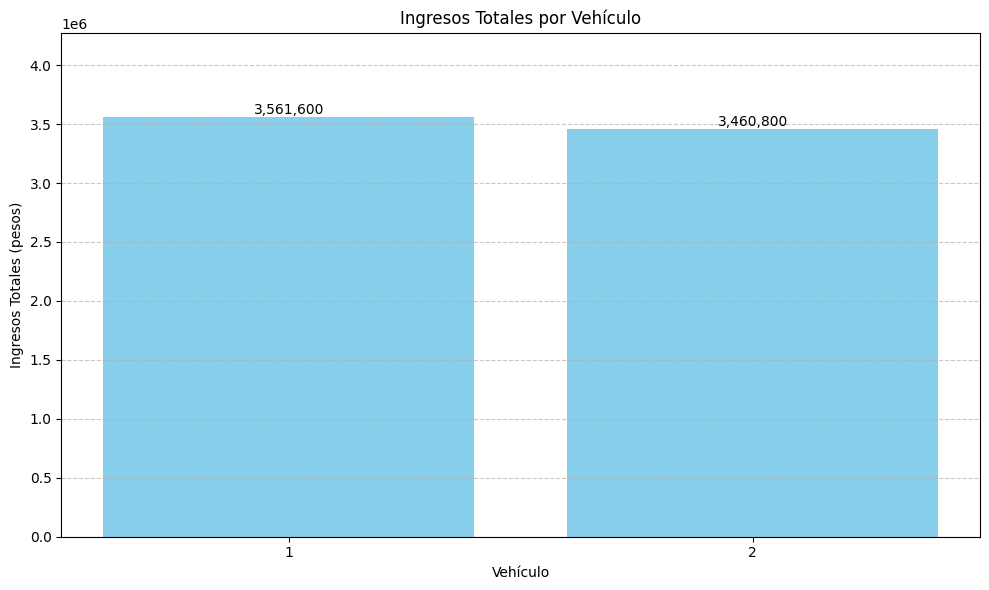

In [72]:


df_resultados['Demanda'] = pd.to_numeric(df_resultados['Demanda'], errors='coerce')


costo_por_unidad = 2800

df_ingresos = df_resultados.groupby('Vehículo')['Demanda'].sum().reset_index()
df_ingresos['Ingresos Totales'] = df_ingresos['Demanda'] * costo_por_unidad

print("Ingresos Totales por Vehículo:")
print(df_ingresos)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_ingresos['Vehículo'].astype(str), df_ingresos['Ingresos Totales'], color='skyblue')
plt.title('Ingresos Totales por Vehículo')
plt.xlabel('Vehículo')
plt.ylabel('Ingresos Totales (pesos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, df_ingresos['Ingresos Totales'].max() * 1.2)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



# Grafico costo de transporte por bus

Distancia total recorrida y costos de combustible por vehículo:
   Vehículo  Distancia (km)  Costo Combustible
0         1           200.0            63360.0
1         2           200.0            63360.0


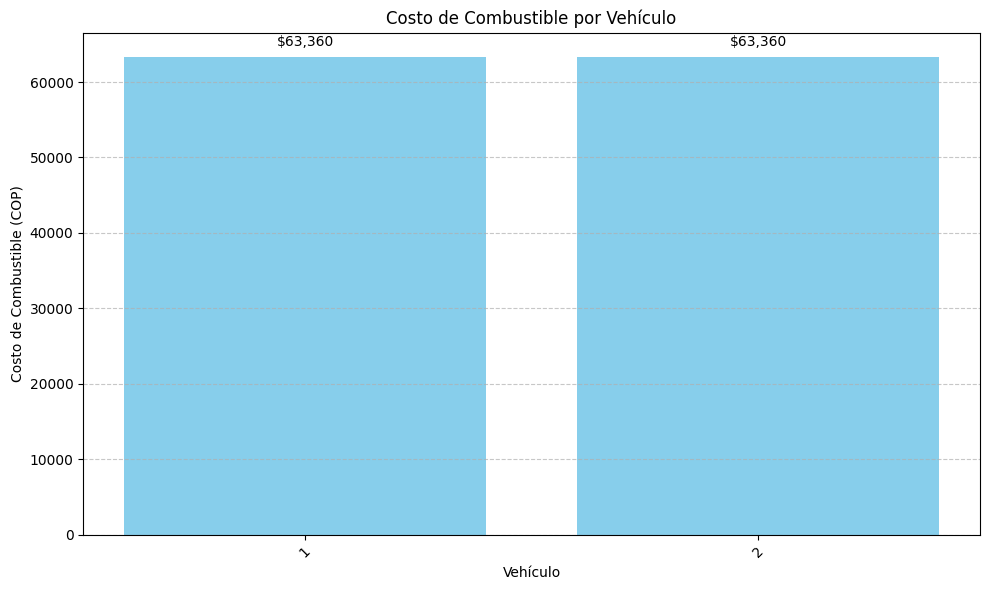

In [73]:
velocidad_kmh = 12
costo_combustible_por_km = 316.8
df_resultados['Hora Salida'] = df_resultados['Hora Salida'].astype(str)
df_resultados['Hora Llegada'] = df_resultados['Hora Llegada'].astype(str)
fecha_base = "2024-08-05 "
df_resultados['Hora Salida Datetime'] = pd.to_datetime(fecha_base + df_resultados['Hora Salida'])
df_resultados['Hora Llegada Datetime'] = pd.to_datetime(fecha_base + df_resultados['Hora Llegada'])

df_resultados['Horas en Ruta'] = (df_resultados['Hora Llegada Datetime'] - df_resultados['Hora Salida Datetime']).dt.total_seconds() / 3600

df_resultados['Distancia (km)'] = df_resultados['Horas en Ruta'] * velocidad_kmh

df_resultados['Costo Combustible'] = df_resultados['Distancia (km)'] * costo_combustible_por_km

df_costos_combustible = df_resultados.groupby('Vehículo')[['Distancia (km)', 'Costo Combustible']].sum().reset_index()


print("Distancia total recorrida y costos de combustible por vehículo:")
print(df_costos_combustible)


plt.figure(figsize=(10, 6))
plt.bar(df_costos_combustible['Vehículo'].astype(str), df_costos_combustible['Costo Combustible'], color='skyblue')
plt.title('Costo de Combustible por Vehículo')
plt.xlabel('Vehículo')
plt.ylabel('Costo de Combustible (COP)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, valor in enumerate(df_costos_combustible['Costo Combustible']):
    plt.text(i, valor + 1000, f"${int(valor):,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()